# LinearSVM

In [2]:
import pandas as pd
import numpy as np
import gensim
from collections import Counter
import jieba
import re

Word2VecModel = gensim.models.Word2Vec.load(r'weibo_word2vec\200\weibo_59g_embedding_200.model') # 读取词向量

In [3]:
import jieba.posseg as peg

def sen2vec(s):
    s = str(s)
    s = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", s) #去标点符号
    res = peg.cut(s)
    sen2vec = np.zeros(200)
    i = 0
    for word, flag in res:
        if flag in ['n', 'v', 'vd', 'vn', 'a', 'ad', 'an']:
            try:
                word2vec = Word2VecModel.wv[word]
                sen2vec += word2vec
                i += 1
            except:
                continue
    if i != 0:
        sen2vec = list(sen2vec/i)
    else:
        sen2vec = None
    return sen2vec

classify_data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
classify_data = classify_data[classify_data['emo_prob_kw']!='-1'][classify_data['emo_prob_stsc']!='-1']

classify_data['sen2vec'] = classify_data['text'].apply(sen2vec)

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ChuAI\AppData\Local\Temp\jieba.cache
Loading model cost 1.165 seconds.
Prefix dict has been built successfully.


In [4]:
classify_data = classify_data.dropna()
classify_data = classify_data.reset_index(drop=True)
for i in range(200):
    classify_data[str(i)] = classify_data['sen2vec'].apply(lambda a:a[i])
print(classify_data.shape)
classify_data.head()

(18065, 242)


,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,190,191,192,193,194,195,196,197,198,199
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,2.407976,0.518509,0.050769,0.331647,0.098490,-1.453419,1.488517,-0.915492,0.207427,-0.536866
1,3,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,0.320381,-0.583532,-2.387895,-0.657668,0.090361,-1.441739,0.053343,0.233956,1.364836,0.082299
2,4,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,-0.825434,-1.440878,0.695721,-0.700351,0.084041,1.770793,0.873148,-0.726289,0.238108,0.666609
3,9,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,-0.663671,-0.076343,0.571795,-0.852606,-0.009248,-1.402094,0.504896,1.263449,0.346545,-0.744078
4,11,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,0.033824,0.667632,-1.497559,-0.549697,0.438901,-1.531065,0.298864,-0.794461,0.651316,0.271579


In [5]:
import os

path = 'data/emo_dict_final_dropdup'
files = os.listdir(path)
sent_dict = []
for file in files:
    position = path + '/' +file
    with open(position, 'r', encoding='utf-8-sig') as f:
        for word in f:
            word = word.strip()
            tup = (word, file[:-4])
            sent_dict.append(tup)
            
sent_dict = pd.DataFrame(sent_dict)
sent_dict.columns = ['word', 'emo']
Counter(sent_dict['emo'])

Counter({'anger': 1323,
         'disgust': 710,
         'fear': 813,
         'joy': 2066,
         'sadness': 1243})

In [6]:
def word2vec(word):
    vec = 'NAN'
    try:
        vec = Word2VecModel.wv[word]
    except:
        pass
    return vec
sent_dict['word2vec'] = sent_dict['word'].apply(word2vec)
sent_dict = sent_dict[sent_dict['word2vec']!='NAN']
for i in range(200):
    sent_dict[str(i)] = sent_dict['word2vec'].apply(lambda a: a[i])  
sent_dict.head()

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\ops.py:1122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


,word,emo,word2vec,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
0,天理难容,anger,"[-2.4329581, 2.1425982, -0.912153, 4.6215353, ...",-2.432958,2.142598,-0.912153,4.621535,-2.435631,0.408013,0.497818,...,-0.111548,1.582454,2.329996,1.312724,2.515188,4.426198,1.084765,1.514905,-1.023120,-3.272849
1,打死,anger,"[-3.5273945, 2.3996017, -3.0997398, 4.5211573,...",-3.527395,2.399602,-3.099740,4.521157,2.169373,-0.567506,2.457765,...,-1.868088,-0.494517,1.875681,-0.677057,3.769439,1.942675,0.272890,3.458953,1.046658,-0.571490
2,举报,anger,"[0.3900028, 6.1153, -0.15394114, -1.9220417, -...",0.390003,6.115300,-0.153941,-1.922042,-3.855200,2.046079,1.355707,...,-1.245605,-2.828398,-2.614823,1.958842,0.834259,5.844448,2.608781,3.562984,-0.541105,-0.810082
3,抨击,anger,"[1.5283858, 1.3557477, -0.37390372, -3.0361903...",1.528386,1.355748,-0.373904,-3.036190,-2.410696,2.181081,-2.106566,...,1.144470,-0.146015,-0.433642,0.231915,-0.027052,2.378011,1.205818,0.831053,-0.621992,-3.609693
4,胡扯,anger,"[-0.73264426, 0.47450316, -1.7347925, -0.36623...",-0.732644,0.474503,-1.734792,-0.366239,-2.018499,-0.656398,0.533876,...,1.954450,1.491167,-0.171987,0.604129,2.422400,0.843593,1.340616,-1.626257,-1.823427,-0.023158


In [7]:
emo = ['anger', 'disgust', 'joy', 'sadness', 'fear']
emo_to_idx = { e:i for i, e in enumerate(emo)}
sent_dict['emo'] = sent_dict['emo'].apply(lambda e: emo_to_idx[e])

In [8]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
rus = RandomOverSampler(random_state=2020)
X, y = rus.fit_sample(sent_dict.loc[:,'0':'199'].get_values(), sent_dict['emo'].get_values())
print(Counter(y))
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cla_gen = kf.split(X, y)
score = 0
for train_idx, test_idx in cla_gen:
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    clf = AdaBoostClassifier(n_estimators=200).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    if score<s:
        score = s
        sclf = clf
    else:
        pass
    print(s)

Counter({0: 1568, 1: 1568, 4: 1568, 2: 1568, 3: 1568})
0.6600765306122449
0.6721938775510204
0.6683673469387755
0.642219387755102
0.673469387755102


# AdaBoost

In [9]:
classify_data = classify_data.drop(['index'], axis=1)
classify_data = classify_data.reset_index()
def conf(idx):
    c = sclf.predict_proba([classify_data.loc[idx,'0':'199']])
    return list(c[0])
classify_data['emo_conf_ada'] = classify_data['index'].apply(conf)

# 决策树

In [10]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
rus = RandomOverSampler(random_state=2020)
X, y = rus.fit_sample(sent_dict.loc[:,'0':'199'].get_values(), sent_dict['emo'].get_values())
print(Counter(y))
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cla_gen = kf.split(X, y)
score = 0
for train_idx, test_idx in cla_gen:
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    if score<s:
        score = s
        sclf = clf
    else:
        pass
    print(s)

Counter({0: 1568, 1: 1568, 4: 1568, 2: 1568, 3: 1568})
0.7002551020408163
0.7072704081632653
0.7117346938775511
0.6862244897959183
0.7257653061224489


In [11]:
def conf(idx):
    c = sclf.predict_proba([classify_data.loc[idx,'0':'199']])
    return list(c[0])
classify_data['emo_conf_dtree'] = classify_data['index'].apply(conf)

# logistic

In [12]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
rus = RandomOverSampler(random_state=2020)
X, y = rus.fit_sample(sent_dict.loc[:,'0':'199'].get_values(), sent_dict['emo'].get_values())
print(Counter(y))
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cla_gen = kf.split(X, y)
score = 0
for train_idx, test_idx in cla_gen:
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    clf = LogisticRegression().fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    if score<s:
        score = s
        sclf = clf
    else:
        pass
    print(s)

Counter({0: 1568, 1: 1568, 4: 1568, 2: 1568, 3: 1568})


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7704081632653061


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7876275510204082


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7844387755102041


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7519132653061225
0.7742346938775511


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
def conf(idx):
    c = sclf.decision_function([classify_data.loc[idx,'0':'199']])
    return list(c[0])
classify_data['emo_conf_logic'] = classify_data['index'].apply(conf)

# SVM

In [14]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
rus = RandomOverSampler(random_state=2020)
X, y = rus.fit_sample(sent_dict.loc[:,'0':'199'].get_values(), sent_dict['emo'].get_values())
print(Counter(y))
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cla_gen = kf.split(X, y)
score = 0
for train_idx, test_idx in cla_gen:
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    clf = svm.LinearSVC().fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    if score<s:
        score = s
        sclf = clf
    else:
        pass
    print(s)

Counter({0: 1568, 1: 1568, 4: 1568, 2: 1568, 3: 1568})


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7066326530612245


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7340561224489796


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7155612244897959


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6996173469387755
0.7480867346938775


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
def conf(idx):
    c = sclf.decision_function([classify_data.loc[idx,'0':'199']])
    return list(c[0])
classify_data['emo_conf_svm'] = classify_data['index'].apply(conf)

# RDG

In [16]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
rus = RandomOverSampler(random_state=2020)
X, y = rus.fit_sample(sent_dict.loc[:,'0':'199'].get_values(), sent_dict['emo'].get_values())
print(Counter(y))
kf = KFold(n_splits=5, shuffle=True, random_state=2020)
cla_gen = kf.split(X, y)
score = 0
for train_idx, test_idx in cla_gen:
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    clf = RidgeClassifier().fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    if score<s:
        score = s
        sclf = clf
    else:
        pass
    print(s)

Counter({0: 1568, 1: 1568, 4: 1568, 2: 1568, 3: 1568})
0.7659438775510204
0.7678571428571429
0.7748724489795918
0.732780612244898
0.7602040816326531


In [17]:
def conf(idx):
    c = sclf.decision_function([classify_data.loc[idx,'0':'199']])
    return list(c[0])
classify_data['emo_conf_rdg'] = classify_data['index'].apply(conf)

# BP

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as tud
from torch.nn.parameter import Parameter

from collections import Counter
import numpy as np
import random
import math

import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

USE_CUDA = torch.cuda.is_available()

random.seed(2020)
np.random.seed(2020)
torch.manual_seed(2020)
if USE_CUDA:
    torch.cuda.manual_seed(2020)
    
# 设置初始参数
NUM_EPOCHS = 200
BATCH_SIZE = 100
LEARNING_RATE = 0.05

In [19]:
trX, testX, trY, testY = train_test_split(X ,y , test_size=0.2, shuffle=True)

In [20]:
# BP神经网络结构
INPUT_SIZE = 200
HIDDEN_SIZE_1 = 200
HIDDEN_SIZE_2 = 200
HIDDEN_SIZE_3 = 200
HIDDEN_SIZE_4 = 200
HIDDEN_SIZE_5 = 200
HIDDEN_SIZE_6 = 200
HIDDEN_SIZE_7 = 200
HIDDEN_SIZE_8 = 200
OUTPUT_SIZE = 5
trX = torch.Tensor(trX)
trY = torch.LongTensor(trY)
model = torch.nn.Sequential(
    torch.nn.Linear(INPUT_SIZE, HIDDEN_SIZE_1),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_1, HIDDEN_SIZE_2),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_2, HIDDEN_SIZE_3),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_3, HIDDEN_SIZE_4),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_4, HIDDEN_SIZE_5),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_5, HIDDEN_SIZE_6),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_6, HIDDEN_SIZE_7),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_7, HIDDEN_SIZE_8),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN_SIZE_8, OUTPUT_SIZE)   
)

In [21]:
# 设置损失函数及优化策略
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), LEARNING_RATE)

In [22]:
# 训练模型

trAuc = []
testAuc = []
for epoch in range(500):
    for start in range(0, len(trX), BATCH_SIZE):
        end = start + BATCH_SIZE
        batchX = trX[start:end]
        batchY = trY[start:end]
        
        y_pred = model(batchX)
        loss = loss_fn(y_pred, batchY)
        
        optimizer.zero_grad()
        loss.backward() # 反向传播
        optimizer.step() #参数更新
        
    loss = loss_fn(model(trX), trY).item()
    testX = torch.Tensor(testX)
    with torch.no_grad():
        Y_pred = model(testX)

    Y_pred = Y_pred.max(1)[1].numpy()
    
    if (epoch+1) % 50 == 0:
        if len(testAuc) == 0 or accuracy_score(testY, Y_pred) > max(testAuc):
            torch.save(model.state_dict(), 'bp.pth') #保存模型
        trAuc.append(accuracy_score(trY, model(trX).max(1)[1].numpy()))
        testAuc.append(accuracy_score(testY, Y_pred))
        print('Epoch:', epoch+1, 'Loss:', loss, 'trAccuracy:',accuracy_score(trY, model(trX).max(1)[1].numpy()), 'testAccuracy:',accuracy_score(testY, Y_pred))

Epoch: 50 Loss: 0.03740702569484711 trAccuracy: 0.990593112244898 testAccuracy: 0.8520408163265306
Epoch: 100 Loss: 0.00038731758832000196 trAccuracy: 1.0 testAccuracy: 0.860969387755102
Epoch: 150 Loss: 0.00011162205919390544 trAccuracy: 1.0 testAccuracy: 0.8616071428571429
Epoch: 200 Loss: 6.018169005983509e-05 trAccuracy: 1.0 testAccuracy: 0.8603316326530612
Epoch: 250 Loss: 3.977946471422911e-05 trAccuracy: 1.0 testAccuracy: 0.8603316326530612
Epoch: 300 Loss: 2.9130507755326107e-05 trAccuracy: 1.0 testAccuracy: 0.860969387755102
Epoch: 350 Loss: 2.26990960072726e-05 trAccuracy: 1.0 testAccuracy: 0.860969387755102
Epoch: 400 Loss: 1.8441103748045862e-05 trAccuracy: 1.0 testAccuracy: 0.860969387755102
Epoch: 450 Loss: 1.5437162801390514e-05 trAccuracy: 1.0 testAccuracy: 0.860969387755102
Epoch: 500 Loss: 1.3213531019573566e-05 trAccuracy: 1.0 testAccuracy: 0.860969387755102


In [23]:
model.load_state_dict(torch.load('bp.pth'))
model.eval()

Sequential(
  (0): Linear(in_features=200, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): Linear(in_features=200, out_features=200, bias=True)
  (9): ReLU()
  (10): Linear(in_features=200, out_features=200, bias=True)
  (11): ReLU()
  (12): Linear(in_features=200, out_features=200, bias=True)
  (13): ReLU()
  (14): Linear(in_features=200, out_features=200, bias=True)
  (15): ReLU()
  (16): Linear(in_features=200, out_features=5, bias=True)
)

In [24]:
with torch.no_grad():
    pred = model(torch.Tensor(classify_data.loc[:,'0':'199'].get_values())).numpy()

In [25]:
# classify_data = classify_data.reset_index(drop=True)
# classify_data = classify_data.reset_index()
classify_data['emo_conf_bp'] = classify_data['index'].apply(lambda idx: pred[idx])

In [26]:
classify_data.head()

,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,196,197,198,199,emo_conf_ada,emo_conf_dtree,emo_conf_logic,emo_conf_svm,emo_conf_rdg,emo_conf_bp
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,1.488517,-0.915492,0.207427,-0.536866,"[0.19913321575944723, 0.19186039027388596, 0.2...","[0.0, 0.0, 0.0, 1.0, 0.0]","[-2.9124126807112636, -1.708335580523691, 3.67...","[-1.8536126501935553, -1.365930299859468, 0.52...","[-1.0974785538569711, -0.8714997662856792, 0.0...","[-23.510193, 4.794898, 32.47425, 13.062145, -2..."
1,1,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,0.053343,0.233956,1.364836,0.082299,"[0.1980970466219263, 0.19250466806039518, 0.20...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-2.5641958753050575, -3.070461281467428, 5.32...","[-1.713535514982862, -1.911511632506055, 1.089...","[-1.0612508859553853, -1.0293120318530968, 0.2...","[-32.06194, 6.67353, 44.371708, 17.877968, -36..."
2,2,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,0.873148,-0.726289,0.238108,0.666609,"[0.2048406988565272, 0.2008629799529364, 0.193...","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.5417255778016448, -0.02668884494747603, -0....","[-0.7848593738351044, -1.0582512146401688, -1....","[-0.5788565224566354, -0.6460236926583343, -0....","[3.240104, 10.770984, -2.6580915, 0.3718179, -..."
3,3,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,0.504896,1.263449,0.346545,-0.744078,"[0.2003987503367084, 0.19324100079377787, 0.20...","[1.0, 0.0, 0.0, 0.0, 0.0]","[-0.5276007664533418, -2.0675190233754313, 1.7...","[-1.0545854073853338, -1.5700181677984772, -0....","[-0.8453024860203585, -0.9256126635942802, -0....","[-14.744664, 2.3834178, 19.923159, 8.38103, -1..."
4,4,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,0.298864,-0.794461,0.651316,0.271579,"[0.19983121372577076, 0.19220868684903167, 0.2...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-2.260725705265821, -2.514155529912726, 5.447...","[-1.6871592576889773, -1.5775408685396557, 1.5...","[-0.936226159228141, -0.9706132803076751, 0.35...","[-33.18053, 7.5941706, 46.187714, 18.341328, -..."


In [27]:
classify_data.to_csv('data/emo_prob_conf_9.csv', index=False)

In [28]:
from collections import defaultdict
from random import choice
import ast

def num2seq(a):
    dic = defaultdict(list)
    prob = ast.literal_eval(a)
    b = [0,0,0,0,0]
    for k, va in [(v, i) for i, v in enumerate(prob)]:
        dic[k].append(va)
    seq = [1,2,3,4,5]
    i = 5
    for num in sorted(set(prob)):
        seq2 = seq[i-len(dic[num]):i]
        for idx in dic[num]:
            c = choice(seq2)
            b[idx] = c
            seq2.remove(c)
        i -= len(dic[num])
    return b
def num2seq2(prob):
    dic = defaultdict(list)
    b = [0,0,0,0,0]
    for k, va in [(v, i) for i, v in enumerate(prob)]:
        dic[k].append(va)
    seq = [1,2,3,4,5]
    i = 5
    for num in sorted(set(prob)):
        seq2 = seq[i-len(dic[num]):i]
        for idx in dic[num]:
            c = choice(seq2)
            b[idx] = c
            seq2.remove(c)
        i -= len(dic[num])
    return b
emo_probs = ['emo_prob', 'emo_prob_kw', 'emo_prob_stsc','emo_conf_ada', 'emo_conf_dtree', 'emo_conf_logic', 'emo_conf_svm', 'emo_conf_rdg', 'emo_conf_bp']
i = 0
for ep in emo_probs:
    if i < 3:
        classify_data[ep+'seq'] = classify_data[ep].apply(num2seq)
    else:
        classify_data[ep+'seq'] = classify_data[ep].apply(num2seq2)
    i+=1
# seq_data = classify_data[emo_probs]
classify_data.head()

,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,emo_conf_bp,emo_probseq,emo_prob_kwseq,emo_prob_stscseq,emo_conf_adaseq,emo_conf_dtreeseq,emo_conf_logicseq,emo_conf_svmseq,emo_conf_rdgseq,emo_conf_bpseq
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,"[-23.510193, 4.794898, 32.47425, 13.062145, -2...","[3, 1, 2, 4, 5]","[3, 5, 1, 4, 2]","[5, 2, 1, 3, 4]","[3, 5, 1, 2, 4]","[2, 4, 3, 1, 5]","[5, 4, 1, 2, 3]","[5, 4, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]"
1,1,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,"[-32.06194, 6.67353, 44.371708, 17.877968, -36...","[1, 2, 3, 4, 5]","[4, 3, 1, 5, 2]","[5, 3, 2, 4, 1]","[4, 5, 1, 2, 3]","[2, 3, 1, 5, 4]","[4, 5, 1, 2, 3]","[4, 5, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]"
2,2,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,"[3.240104, 10.770984, -2.6580915, 0.3718179, -...","[5, 2, 4, 3, 1]","[4, 1, 3, 5, 2]","[2, 1, 4, 5, 3]","[1, 2, 5, 3, 4]","[5, 4, 3, 1, 2]","[1, 3, 4, 2, 5]","[1, 3, 4, 2, 5]","[2, 4, 1, 5, 3]","[2, 1, 4, 3, 5]"
3,3,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,"[-14.744664, 2.3834178, 19.923159, 8.38103, -1...","[3, 1, 2, 4, 5]","[2, 5, 1, 3, 4]","[5, 3, 2, 1, 4]","[4, 5, 1, 2, 3]","[1, 4, 2, 3, 5]","[3, 5, 2, 1, 4]","[3, 5, 1, 2, 4]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]"
4,4,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,"[-33.18053, 7.5941706, 46.187714, 18.341328, -...","[2, 4, 1, 3, 5]","[5, 3, 1, 2, 4]","[4, 2, 1, 3, 5]","[3, 5, 1, 2, 4]","[3, 4, 1, 5, 2]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]"


In [29]:
# seq_data = seq_data.reset_index()
mean_list = []
def std(idx):
    prob = []
    for e in emo_probs:
        prob.append(classify_data.loc[idx, e+'seq'])
    cv_list = []
    mean_seq = []
    std_seq = []
    mean = 0
    std  = 0
    for i in range(5):
        for j in range(0, len(prob)):
            mean += prob[j][i]
        mean = mean/(len(prob))
        mean_seq.append(mean)
        for j in range(0, len(prob)):
            std += (prob[j][i]-mean)**2
        std = np.sqrt(std/(len(prob)-1))
        std_seq.append(std)
    mean_list.append(mean_seq)
    return std_seq
# seq_data = seq_data.reset_index(drop=True)
# seq_data = seq_data.reset_index()
classify_data['emo_std'] = classify_data['index'].apply(std)
classify_data.head()

,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,emo_probseq,emo_prob_kwseq,emo_prob_stscseq,emo_conf_adaseq,emo_conf_dtreeseq,emo_conf_logicseq,emo_conf_svmseq,emo_conf_rdgseq,emo_conf_bpseq,emo_std
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,"[3, 1, 2, 4, 5]","[3, 5, 1, 4, 2]","[5, 2, 1, 3, 4]","[3, 5, 1, 2, 4]","[2, 4, 3, 1, 5]","[5, 4, 1, 2, 3]","[5, 4, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.1666666666666667, 1.4607050085780655, 0.950..."
1,1,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,"[1, 2, 3, 4, 5]","[4, 3, 1, 5, 2]","[5, 3, 2, 4, 1]","[4, 5, 1, 2, 3]","[2, 3, 1, 5, 4]","[4, 5, 1, 2, 3]","[4, 5, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.3228756555322951, 1.2657360909776036, 0.942..."
2,2,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,"[5, 2, 4, 3, 1]","[4, 1, 3, 5, 2]","[2, 1, 4, 5, 3]","[1, 2, 5, 3, 4]","[5, 4, 3, 1, 2]","[1, 3, 4, 2, 5]","[1, 3, 4, 2, 5]","[2, 4, 1, 5, 3]","[2, 1, 4, 3, 5]","[1.6666666666666667, 1.3412828860912458, 1.241..."
3,3,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,"[3, 1, 2, 4, 5]","[2, 5, 1, 3, 4]","[5, 3, 2, 1, 4]","[4, 5, 1, 2, 3]","[1, 4, 2, 3, 5]","[3, 5, 2, 1, 4]","[3, 5, 1, 2, 4]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[1.2018504251546631, 1.5147394801480194, 0.854..."
4,4,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,"[2, 4, 1, 3, 5]","[5, 3, 1, 2, 4]","[4, 2, 1, 3, 5]","[3, 5, 1, 2, 4]","[3, 4, 1, 5, 2]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[0.8660254037844388, 1.2204204255006665, 0.629..."


In [30]:
classify_data['emo_avg'] = classify_data['index'].apply(lambda idx: mean_list[idx])
classify_data.head()

,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,emo_prob_kwseq,emo_prob_stscseq,emo_conf_adaseq,emo_conf_dtreeseq,emo_conf_logicseq,emo_conf_svmseq,emo_conf_rdgseq,emo_conf_bpseq,emo_std,emo_avg
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,"[3, 5, 1, 4, 2]","[5, 2, 1, 3, 4]","[3, 5, 1, 2, 4]","[2, 4, 3, 1, 5]","[5, 4, 1, 2, 3]","[5, 4, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.1666666666666667, 1.4607050085780655, 0.950...","[3.888888888888889, 3.987654320987654, 1.77640..."
1,1,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,"[4, 3, 1, 5, 2]","[5, 3, 2, 4, 1]","[4, 5, 1, 2, 3]","[2, 3, 1, 5, 4]","[4, 5, 1, 2, 3]","[4, 5, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.3228756555322951, 1.2657360909776036, 0.942...","[3.6666666666666665, 4.0740740740740735, 1.786..."
2,2,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,"[4, 1, 3, 5, 2]","[2, 1, 4, 5, 3]","[1, 2, 5, 3, 4]","[5, 4, 3, 1, 2]","[1, 3, 4, 2, 5]","[1, 3, 4, 2, 5]","[2, 4, 1, 5, 3]","[2, 1, 4, 3, 5]","[1.6666666666666667, 1.3412828860912458, 1.241...","[2.5555555555555554, 2.617283950617284, 3.8463..."
3,3,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,"[2, 5, 1, 3, 4]","[5, 3, 2, 1, 4]","[4, 5, 1, 2, 3]","[1, 4, 2, 3, 5]","[3, 5, 2, 1, 4]","[3, 5, 1, 2, 4]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[1.2018504251546631, 1.5147394801480194, 0.854...","[3.2222222222222223, 4.3580246913580245, 1.928..."
4,4,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,"[5, 3, 1, 2, 4]","[4, 2, 1, 3, 5]","[3, 5, 1, 2, 4]","[3, 4, 1, 5, 2]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[0.8660254037844388, 1.2204204255006665, 0.629...","[3.6666666666666665, 4.185185185185185, 1.4650..."


In [31]:
mean_list[1]

[3.6666666666666665,
 4.0740740740740735,
 1.7860082304526748,
 3.4206675811614082,
 3.4911852867957123]

In [32]:
emos_avg = ['anger_avg', 'disgust_avg', 'joy_avg', 'sadness_avg', 'fear_avg']
for i in range(len(emos_avg)):
    classify_data[emos_avg[i]] = classify_data['emo_avg'].apply(lambda l:l[i])

In [33]:
emos_std = ['anger_std', 'disgust_std', 'joy_std', 'sadness_std', 'fear_std']
for i in range(len(emos_std)):
    classify_data[emos_std[i]] = classify_data['emo_std'].apply(lambda l:l[i])

In [34]:
classify_data.head()

,index,text,repostNum,followers_count,friends_count,status,label,emo_prob,anger,disgust,...,emo_conf_svmseq,emo_conf_rdgseq,emo_conf_bpseq,emo_std,emo_avg,anger_std,disgust_std,joy_std,sadness_std,fear_std
0,0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,2,6398,681,1,LT,"[0.22154834657910097, 0.31011575099068794, 0.2...",0.221548,0.310116,...,"[5, 4, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.1666666666666667, 1.4607050085780655, 0.950...","[3.888888888888889, 3.987654320987654, 1.77640...",1.166667,1.460705,0.950495,1.091063,1.319713
1,1,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,4,124943,958,1,LT,"[0.3186707741224802, 0.27295897992008183, 0.26...",0.318671,0.272959,...,"[4, 5, 1, 2, 3]","[5, 4, 1, 3, 2]","[4, 3, 1, 2, 5]","[1.3228756555322951, 1.2657360909776036, 0.942...","[3.6666666666666665, 4.0740740740740735, 1.786...",1.322876,1.265736,0.942733,1.362567,1.481197
2,2,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,2,444675,315,1,LT,"[0.0, 0.21476633726982494, 0.04429565368238146...",0.000000,0.214766,...,"[1, 3, 4, 2, 5]","[2, 4, 1, 5, 3]","[2, 1, 4, 3, 5]","[1.6666666666666667, 1.3412828860912458, 1.241...","[2.5555555555555554, 2.617283950617284, 3.8463...",1.666667,1.341283,1.241201,1.598460,1.623207
3,3,发表了博文 《天地“粮”心——粒粒皆辛苦——1版 第614期》 - 天地“粮”心——粒粒皆...,0,2782,27,1,LT,"[0.2520013503903249, 0.2739585020345602, 0.255...",0.252001,0.273959,...,"[3, 5, 1, 2, 4]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[1.2018504251546631, 1.5147394801480194, 0.854...","[3.2222222222222223, 4.3580246913580245, 1.928...",1.201850,1.514739,0.854929,1.050226,0.908208
4,4,「我在宝兰 我是榜样」党工团共建活动启动仪式圆满结束，希望宝兰客专广大青年行动起来，争当岗位...,0,1246,304,1,LT,"[0.2209305673189929, 0.18731305695817824, 0.37...",0.220931,0.187313,...,"[4, 3, 1, 2, 5]","[4, 5, 1, 2, 3]","[4, 3, 1, 2, 5]","[0.8660254037844388, 1.2204204255006665, 0.629...","[3.6666666666666665, 4.185185185185185, 1.4650...",0.866025,1.220420,0.629148,1.065941,1.218964


In [49]:
classify_data_T[['anger_avg', 'disgust_avg', 'joy_avg', 'sadness_avg', 'fear_avg']].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,3.442622,3.883473,2.567956,2.765095,3.747426
std,0.685257,0.547386,1.121760,0.520543,0.911518
min,1.000000,1.567901,1.297668,1.295382,1.301411
25%,3.222222,3.580247,1.566529,2.425469,3.161933
50%,3.555556,3.962963,2.149520,2.746837,3.961507
75%,3.888889,4.271605,3.478395,3.063595,4.440905
max,4.777778,5.271605,5.469136,4.911904,5.361903


In [50]:
classify_data_F[['anger_avg', 'disgust_avg', 'joy_avg', 'sadness_avg', 'fear_avg']].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,2.820390,4.087925,3.296035,2.893998,3.357023
std,0.746122,0.630079,0.872410,0.579022,0.874507
min,1.000000,1.481481,1.318244,1.321750,1.296804
25%,2.444444,3.765432,2.713306,2.524310,2.858355
50%,2.888889,4.271605,3.063100,2.888889,3.283358
75%,3.333333,4.543210,3.934156,3.215059,3.987451
max,4.555556,5.197531,5.458162,4.782350,5.405799


# CCDF

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classify_data_9_cla_logit.csv')
data.shape

(18065, 262)

In [2]:
T = data[data['label']=='LT'].append(data[data['label']=='HT'])
F = data[data['label']=='LF'].append(data[data['label']=='HF'])
HLT = data[data['label']=='LT'][data['followers_count']>=1000]
LHF = data[data['label']=='HF'][data['followers_count']<1000]
HLF = data[data['label']=='LF'][data['followers_count']>=1000]
L = data[data['label']=='LT'].append(data[data['label']=='LF'])
H = data[data['label']=='HT'].append(data[data['label']=='HF'])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [3]:
import statsmodels.api as sm
def ecdf(data):
    return sm.distributions.ECDF(data)

In [9]:
import matplotlib.pyplot as plt
font1 = {
    'weight' : 'normal',
    'size'   : 18,
}
font2 = {
    'weight' : 'normal',
    'size'   : 14,
}
def plot_ccdf(news_list, emo, labels, colors, sname, ls):
#     plt.style.use('seaborn-white')
    lab_dict = {'anger_avg':'Anger', 'disgust_avg':'Disgust', 'joy_avg':'Joy', 'sadness_avg':'Sadness', 'fear_avg':'Fear'}
    fig, ax = plt.subplots()
    for i in range(len(news_list)):
        ax.plot(np.arange(0,5.01,0.01), 
                1-ecdf(news_list[i][emo])(np.arange(0,5.01,0.01)), 
                label=labels[i], 
                color=colors[i],
                linewidth=3, 
                linestyle=ls)
    ax.tick_params(labelsize=16, colors='black')
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(1,6))
#     ax.set_xlabel('Proportion', font1, color='black')
    ax.set_xlabel(lab_dict[emo], font1, color='black')
    ax.set_ylabel('CCDF', font1, color='black')
    ax.set_ylim(0,1)
    ax.set_xlim(1,5)
    if emo == 'anger_avg':
        ax.legend(prop=font2)
    plt.tight_layout()
    plt.savefig('images/'+ str(emo) +'_ccdf'+ str(sname)+ '.pdf')
    plt.savefig('images/'+ str(emo) +'_ccdf'+ str(sname)+ '.jpg', dpi=600)
#     plt.show()

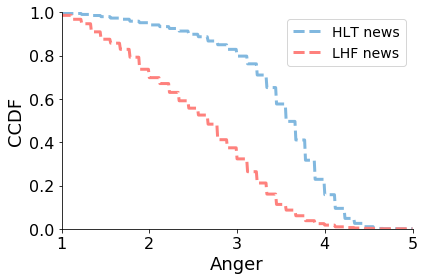

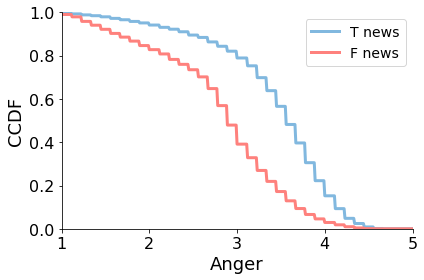

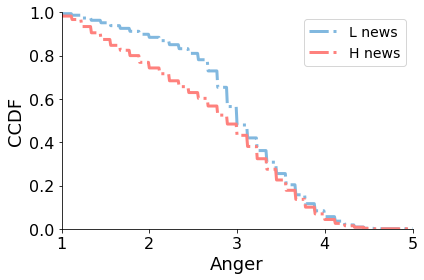

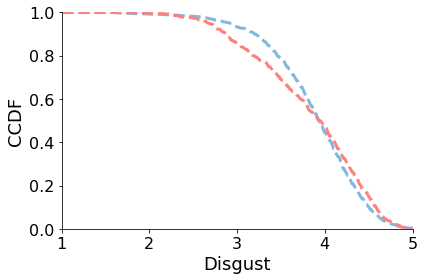

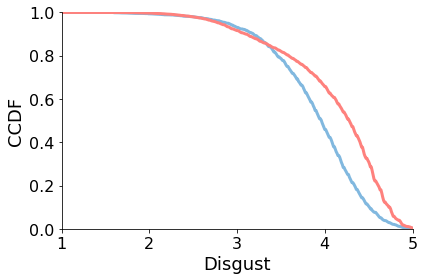

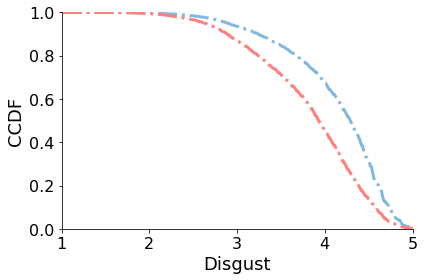

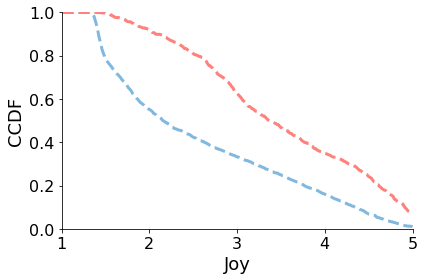

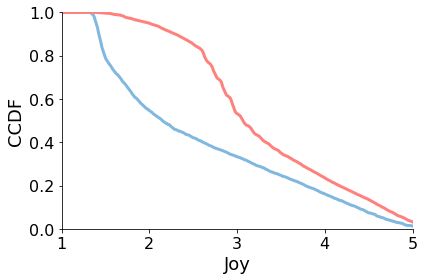

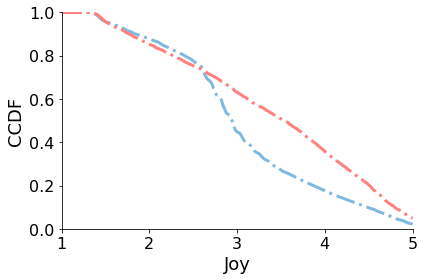

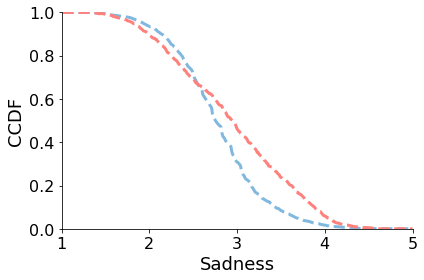

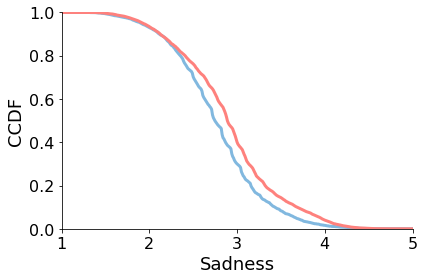

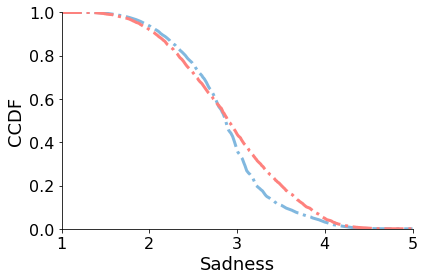

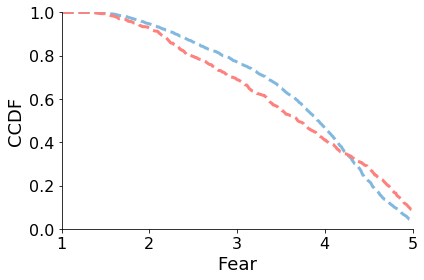

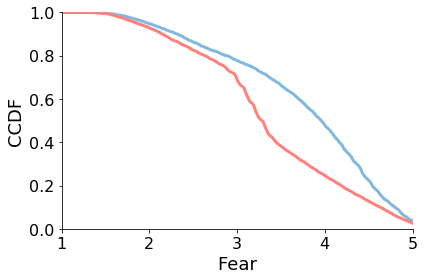

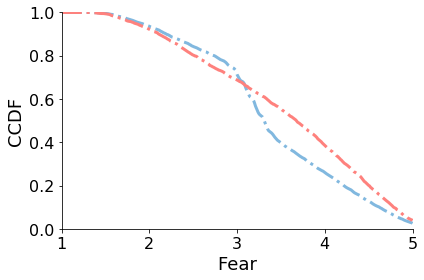

In [10]:
emos =  ['anger_avg', 'disgust_avg', 'joy_avg', 'sadness_avg', 'fear_avg']
for emo in emos:
    plot_ccdf([HLT, LHF], emo, labels=['HLT news', 'LHF news'], colors=['#81B8DF', '#FE817D'], sname=1, ls='--')
    plot_ccdf([T, F], emo, labels=['T news', 'F news'], colors=['#81B8DF', '#FE817D'], sname=2, ls='-')
    plot_ccdf([L, H], emo, labels=['L news', 'H news'], colors=['#81B8DF', '#FE817D'], sname=3, ls='-.')

In [11]:
from scipy.stats import ks_2samp

for emo in emos:
    print(emo)
    print('    HLT-LHF:{}'.format(ks_2samp(HLT[emo], LHF[emo])))
    print('    T-F:{}'.format(ks_2samp(T[emo], F[emo])))
    print('    L-H:{}'.format(ks_2samp(L[emo], H[emo])))

anger_avg
    HLT-LHF:Ks_2sampResult(statistic=0.4989870374417862, pvalue=4.0529134673175943e-140)
    T-F:Ks_2sampResult(statistic=0.4288488079318868, pvalue=0.0)
    L-H:Ks_2sampResult(statistic=0.18110535270662753, pvalue=3.12237919502998e-96)
disgust_avg
    HLT-LHF:Ks_2sampResult(statistic=0.10617332728077697, pvalue=8.482796493014533e-07)
    T-F:Ks_2sampResult(statistic=0.260474496406762, pvalue=7.44520374231865e-166)
    L-H:Ks_2sampResult(statistic=0.2455406456832695, pvalue=1.5592158648392133e-176)
joy_avg
    HLT-LHF:Ks_2sampResult(statistic=0.39979376474610084, pvalue=4.231842517508254e-90)
    T-F:Ks_2sampResult(statistic=0.4418178339671558, pvalue=0.0)
    L-H:Ks_2sampResult(statistic=0.2373108759508999, pvalue=6.313612555718142e-165)
sadness_avg
    HLT-LHF:Ks_2sampResult(statistic=0.20101912719895537, pvalue=4.265565629654849e-23)
    T-F:Ks_2sampResult(statistic=0.14174209551926076, pvalue=2.0615819056043056e-49)
    L-H:Ks_2sampResult(statistic=0.12171702194300194, pv

In [29]:
T[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,3.442622,3.883473,2.567956,2.765095,3.747426
std,0.685257,0.547386,1.121760,0.520543,0.911518
min,1.000000,1.567901,1.297668,1.295382,1.301411
25%,3.222222,3.580247,1.566529,2.425469,3.161933
50%,3.555556,3.962963,2.149520,2.746837,3.961507
75%,3.888889,4.271605,3.478395,3.063595,4.440905
max,4.777778,5.271605,5.469136,4.911904,5.361903


In [30]:
F[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,2.820390,4.087925,3.296035,2.893998,3.357023
std,0.746122,0.630079,0.872410,0.579022,0.874507
min,1.000000,1.481481,1.318244,1.321750,1.296804
25%,2.444444,3.765432,2.713306,2.524310,2.858355
50%,2.888889,4.271605,3.063100,2.888889,3.283358
75%,3.333333,4.543210,3.934156,3.215059,3.987451
max,4.555556,5.197531,5.458162,4.782350,5.405799


In [31]:
L[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,13597.000000,13597.000000,13597.000000,13597.000000,13597.000000
mean,3.003350,4.124329,3.072798,2.853962,3.396054
std,0.724269,0.593661,0.908621,0.542974,0.858397
min,1.000000,1.555556,1.297668,1.295382,1.296804
25%,2.666667,3.827160,2.589849,2.520652,2.925282
50%,3.000000,4.296296,2.943759,2.869989,3.309370
75%,3.555556,4.555556,3.611797,3.150587,4.034327
max,4.777778,5.271605,5.448560,4.911904,5.361903


In [32]:
H[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000
mean,2.747687,3.818081,3.408962,2.915554,3.541970
std,0.883641,0.642307,1.095298,0.644931,0.990407
min,1.000000,1.481481,1.334705,1.321750,1.317262
25%,2.000000,3.391975,2.519204,2.431337,2.717455
50%,2.888889,3.938272,3.534979,2.896815,3.674558
75%,3.444444,4.308642,4.347394,3.378868,4.382039
max,4.555556,5.172840,5.469136,4.640299,5.405799


In [33]:
HLT[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,3.460226,3.877445,2.567116,2.776523,3.727724
std,0.678131,0.540155,1.113701,0.516753,0.915611
min,1.000000,1.580247,1.297668,1.295382,1.301411
25%,3.222222,3.567901,1.566529,2.443759,3.113465
50%,3.555556,3.938272,2.155693,2.753391,3.921201
75%,3.888889,4.259259,3.496228,3.069578,4.434944
max,4.777778,5.271605,5.382716,4.911904,5.361903


In [34]:
LHF[emos].describe()

,anger_avg,disgust_avg,joy_avg,sadness_avg,fear_avg
count,879.000000,879.000000,879.000000,879.000000,879.000000
mean,2.574137,3.816795,3.489314,2.931249,3.612004
std,0.791420,0.649136,1.035653,0.701081,1.060550
min,1.000000,1.629630,1.414266,1.353452,1.332165
25%,1.888889,3.358025,2.700274,2.372733,2.730868
50%,2.666667,3.938272,3.366255,2.945588,3.692239
75%,3.222222,4.333333,4.482853,3.480338,4.567850
max,4.555556,5.074074,5.458162,4.587106,5.405799
